<a href="https://colab.research.google.com/github/itabhijitb/ML_MATH/blob/main/MATH_WEEK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MATH
## Lecture 1: Introduction

#### Logistics
* Homework with every lecture (ungraded), worked on with TAs and instructors after lecture
* Each  lecture  begins  with  a  10  minute  minute  partnered  quiz—Peer graded•
* 1.5 hour final exam week 6
* Weekly homework to be completed in pairs. These will connect the theory of lectures with practical application.  By the end, it will build up to a full solution to arecommender system, where you’ll be given a collection of ratings users assigned to books on Amazon.com and you want to predict how those users will rate other books.

### Grade Distribution
In total, 60% is needed to pass.
* 40% Homeworks
* 40% Exam
* 20% Quizzes

### Goal
* This is not a weed-out class
* We want everyone to succeed and continue with MLU
* Unless we tell you otherwise, assume you can use all resources, and work in any sized group you want (but submit in pairs!)

#### Attendance
* Attend every lecture
* Sev2+ are allowable exceptions

>> If you miss two classes, we will assume you are no longer interested
>> in the course, and your enrollment will be automatically
>> revoked.

#### Communication
* All communications from us will come through: [mlu.instructure.com](mlu.instructure.com)
* Canvas (the above link) also has a discussion board that we will monitor to answer all questions. If you want to reach us outside
class, this is the best way.

#### Goal
* This is not a weed-out class
* We want everyone to succeed and continue with MLU
* Unless we tell you otherwise, assume you can use all resources, and work in any sized group you want

### Week 1 -  Vectors and Matrices
* Concept of vectors, and matrices
* Notation used to express them
* Geometry of vectors
* Vector norms:L1,L2, L∞
* k-Nearest Neighbors

# MATH
## Lecture 1: The ML Context

# Questions?

## What is ML?

![XKCD](https://imgs.xkcd.com/comics/machine_learning_2x.png)


Machine Learning gives “computers the ability to learn without being explicitly programmed”
* Collection of methods that allow the extraction of rules or patterns from data, rather than explicit construction from a programmer.

## The Role of Mathematics

Throughout history, mathematics has been the language in which we express patterns. Thus before we can begin with machine learning, we need to learn the language it uses to discover those patterns.

### A Warning
> It will not always be immediately clear how everything we discuss will be useful, but trust us, we really have pared this down to the bare essentials!  Nothing is here “just for fun.”

## The ML Pipeline
This is the general structure of any ML based solution. The topics in our class are separated and highlighted in green.

![XKCD](https://drive.corp.amazon.com/view/abhijbha@/HostedImages/MLU/MATH/ml_flow.png?download=true)

### Mathematics in Context
#### The Pedantic Cliche problem
> We want to predict the price of an apartment in Bangalore from the super built area. Our hypothesis is, the bigger the apartment, the costlier it is. Based on this hypothesis, we collect data of various apartment and plot as a scatter plot, with super-built-area in X-axis and price in Y-axis.

The Branch of Mathematics that deals with the process of extracting various insights and useful information of data samples using collection of techniques is called **Statistics**. **Statistical prediction** is the process of making inference of a larger population from based on a sample collected from the same population.

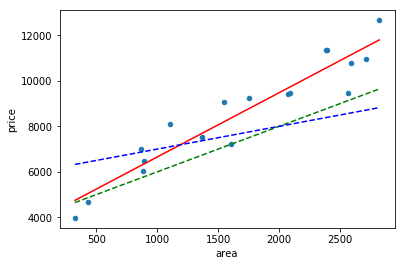

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.DataFrame({'area': [325, 429, 868, 886, 895, 1105, 1370, 1550, 1602,
                            1751, 2074, 2092, 2384, 2391, 2561, 2592, 2715, 2820],
                   'price': [3975, 4687, 7004, 6058, 6485, 8115, 7510, 9050, 7206,
                             9253, 9422, 9476, 11352, 11373, 9483, 10776, 10945, 12660]})
df.plot.scatter(x='area', y='price')
param_0 = np.polyfit(df.area, df.price, 1)
param_1 = np.asarray([2, 4000])
param_2 = np.asarray([1, 6000])
line_0 = np.poly1d(param_0)
line_1 = np.poly1d(param_1)
line_2 = np.poly1d(param_2)
plt.plot(df.area,line_0(df.area),"r")
plt.plot(df.area,line_1(df.area),"g--",)
plt.plot(df.area,line_2(df.area),"b--",)

To predict the price from the area, we can find a line `y = mx + c`that intersects as many data points as possible. We can then use the line to predict the price of any apartment, if we know its size. Unfortunately, to get that line, we have to try a bunch of lines (as shown in red, green and blue) varing `m` and `c`.
For each of these lines, we also have to determine how close the predicted value $\hat{Y}$ is to the actual value $Y$. In order to do so, we have to calculate the total error for each of the prediction. One of the methods is to calculate the least square error between the predicted and actual value and sum it over all the values.
$$\sum_{i=1}^{n}{\left(\hat{y}_i - y_i\right)}^2$$
Our goal is thus to find that line which has the least error.

<ErrorbarContainer object of 3 artists>

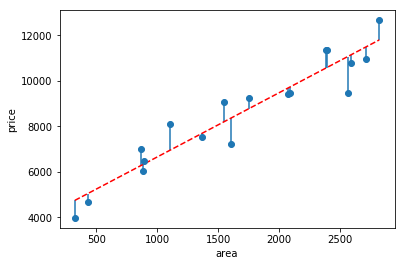

In [ ]:
df.plot.scatter(x='area', y='price')
param = np.polyfit(df.area, df.price, 1)
line = np.poly1d(param)
plt.plot(df.area,line(df.area),"r--")
error = (df.price - line(df.area))
error = [error, [0]*len(error)]
plt.errorbar(df.area, df.price, yerr=error, fmt='o')

For our line $y = mx + c$, we can try various values of `m` and `c` to get the prediction $\hat{Y}$. For each of these predictions, we can calculate the least square error $z=\sum_{i=1}^{n}{\left(\hat{y}_i - y_i\right)}^2$. We can then plot a three dimensional contour. Our solution is the pair of (m, c), for the lowest error corresponding to the lowest epogy in the below contour.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  
/usr/local/lib/python2.7/dist-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


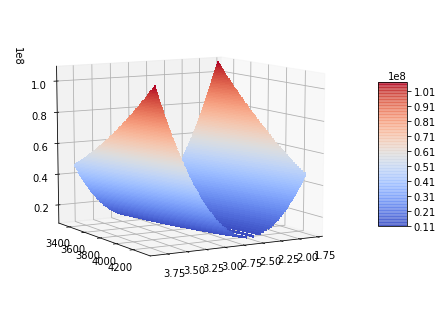

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization!

def Error(df):
    '''Error Function
    :param df: datapoint
    '''
    def helper(M, C):
        '''Curry function that captures and holds the scope of outer function
        :param M: The slope of the line
        :param C: The C-intercept
        '''
        lines = np.sum((row.price - (M*row.area + C))**2 for _, row in df.iterrows())
        return lines
    return helper
error_fn = Error(df)

ms = np.linspace(param[0]-1, param[0] + 1, 200)
cs = np.linspace(param[1]-500, param[1] + 500, 2000)
M, C = np.meshgrid(ms, cs)
Z = error_fn(M, C)
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=10., azim=60)
cset = ax.contour(M, C, Z, 100, cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(cset, shrink=0.5, aspect=5)
plt.show()
cset = ax.contour(M, C, Z)
plt.show()


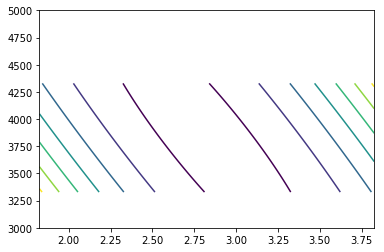

In [ ]:
fig, ax = plt.subplots()
ax.set_ylim(3000,5000)
plt.contour(M, C, Z)

plt.show()

Lets revist, the line $y = mx + c$. This can be written as
$$\Rightarrow y = w_0 + w_1x$$
where $w_0$ is $1$ and $w_1$ is $m$. We will continue to use this notation and call them weight(s).
$$
\Rightarrow y = \left(\begin{array}{cc}
w_0\\
w_1\\
\end{array}\right)^T
\left(\begin{array}{cc}
1\\
x
\end{array}\right)
$$

We collected sample data prices ${y^1, y^2, y^3 \dots y^n}$ for various apartment sizes ${x^1, x^2, x^3 \dots x^n}$. Each of them we can represent in the above matrix notation as
$$ \Rightarrow \left(\begin{array}{cc}
y^1 & y^2 & \dots & y^n
\end{array}\right) = \left(\begin{array}{cc}
w_0\\
w_1
\end{array}\right)^T
\left(\begin{array}{cc}
x_0^1 & x_0^2 & \dots & x_0^n \\
x_1^1 & x_1^2 & \dots & x_1^n
\end{array}\right)
$$
In our last excercise, we were trying various `m` and `c`, denoted by $W$ and calculating the predicted $\hat y$ that minimized the loss or error. If we represent all these values by superscript `i` then we can rewrite the expression as
$$
\Rightarrow \left(\begin{array}{cc}
y_0 \\
y_1 \\
\vdots\\
y_m
\end{array}\right) = \left(\begin{array}{cc}
w_0^0 & w_0^1 & w_0^2 \dots & w_0^m\\
w_1^0 & w_1^1 & w_1^1 \dots & w_1^m\\
\end{array}\right)^T
\left(\begin{array}{cc}
1\\
x
\end{array}\right)
$$

Similarly, we can extent our problem by considering there can be other parameters that controls housing price aka Zones, Builder, Amenities among others. If we represent each of them with the variable $x_i$ where the subscript indicates one of the various parameters, then our expression generalizes to
$$
\Rightarrow \left(\begin{array}{cc}
y_0^0 & y_0^1 & \dots & y_0^k\\
y_1^0 & y_1^1 & \dots & y_1^k\\
\vdots\\
y_m^0 & y_m^1 & \dots & y_m^k
\end{array}\right) = \left(\begin{array}{cc}
w_0^0 & w_0^1 & w_0^2 \dots & w_0^m\\
w_1^0 & w_1^1 & w_1^1 \dots & w_1^m\\
\vdots & \vdots & \vdots \ddots & \vdots\\
w_n^0 & w_n^1 & w_n^1 \dots & w_1^m\\
\end{array}\right)^T
\left(\begin{array}{cc}
1 & 1 & \dots & 1\\
x_1^0 & x_1^1 & \dots & x_1^k\\
\vdots\\
x_n^0 & x_n^1 & \dots & x_n^k
\end{array}\right)
$$
in concise form, we can write it as
$$\Rightarrow Y = W^TX$$
And thus we end up an expression with multiple variables and a transformation thereoff. The Branch of mathematics that deals with multi-variable spaces and linear transformations between them is called **__Linear Algebra__**

Revisiting the contour, we appreciate the fact that, to reach the nadir, we can start from some random position within the contour and take baby steps towards the direction that gradually reduces the error function $\sum_{i=1}^{n}{\left(\hat{y}_i - y_i\right)}^2$. To determine in which direction to move that eventually reduces the loss, we have to calculate the gradiant of the error function. This gradiant is incrementally reduced from the randomly chosen position (weight) until we reach a position we cannot reach further. This process is called *Gradiant Descent*. In order to calculate the gradiant, as we have rightly guessed we end up with **Calculus**


Note in general, for OLS (Lineaer Regression), we determine the average of error for all observation. The mean is halfed, to simply the derivative. It is a constant scaling factor which will not impact the result

$$J(\theta_0, \theta_1) = \frac{1}{2m}\sum\limits_{i=1}^{m}(\hat{y}_i - y_i)^2 = \frac{1}{2m}\sum\limits_{i=1}^{m}(h_\theta(x_i) - y_i)^2$$

$$\frac{\partial}{\partial \theta_j} J(\theta) = (h_\theta(x) - y)x_j$$

So, assuming the cost function to be convex, we can define the gradiant descent as
$$\text{Repeat }\{\theta_j = \theta_j - \alpha \frac{\partial}{\partial{\theta_j}}J(\theta)\}$$
where $\alpha$ is the learning rate

Let's extent the example and try to classify our house based on prime vs non-prime. We are no more trying to predict a value but rather would determine the probability that based on various parameters we need to get a score, that gives a measure of likelihood on a house to be a prime property. Instead of calculating the value, we are predicting the probability of an occurance. The probability ranges between 0 and 1, so we need to introduce a threshold beyond which we would classify an appartment as prime.

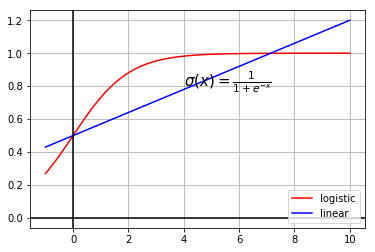

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
sigmoid = lambda x: 1 / (1 + np.exp(-x))
linear = lambda x: 0.07*x + 0.5
x=np.linspace(-1,10,100)
plt.plot(x,sigmoid(x),'r', label='logistic')
plt.plot(x,linear(x),'b', label='linear')
plt.grid()

plt.text(4,0.8,r'$\sigma(x)=\frac{1}{1+e^{-x}}$',fontsize=15)

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='lower right')

plt.show()

So, Machine Learning consist of Statistics, Probability, Linear Algebra and Calculus.
* Calculus tells us how to optimize
* Linear Algebra is used for but not limitted to
    * Data-exploration, cleaning and enrichments
    * One-Hot Encoding
    * Linear Regression
    * Regularization
    * Principal Component Analysis
    * Singular-Value Decomposition
    * Latent Semantic Analysis
    * Recommender Systems
    * Parallizes algorithms during Deep Learning.
* Probability Predicts likely outcome
* Statistics gives us insights and tells us about our goal.

#### Quick Excercise
What branch of mathametics is likely required for the following
* ML ready data?
* Transforming data and extracting features?
*  Building Models?
*  Optimization?

# MATH
## Lecture 1: The Resulting Syllabus

## Week 1 - Vectors and Matrices
* Concept of a vector and notation
* Geometry of vectors
* Vector norms: $L_1, L_2, L_\infty$

# MATH
## Lecture 1: Vectors and Matrices

### Definition

#### Vector vs Scalar
Both **Vector** and **Scalar** are quanity as in, it as a magnitude but unlike scalar, vector has an associated direction. So, a vector not only tells, how far an object is, how fast it is moving but gives an insight on to where the object or where it is heading to.

__Some examples__

| Scalar                 |Vector                         |
| ---------------------- |:-----------------------------:|
| Time(s)                |Accelaration ($\frac{m}{s^2}$) |
| Speed($\frac{m}{s}$)   |Velocity ($\frac{m}{s}$)        |
| Distance(m)            |Displacement                  
| Energy(j)              |Force(N)


In a multivariate space, every position w.r.t an implied origin or another position, has a distance associated (how far point1 is w.r.t origin / point2), and at which direction that point is. As features in ML is represented as a position in the multivariate space, the feature is represented as a vector.

#### Representing Vector
##### Mathamatically
A vector is represented as a sequence of scalar quanitities called components each represented as **Column** or **Row** vectors

**Column Vectors**

The components of the Vector are stacked one below the other as a column
$$\left(\begin{array}{cc}
x_0\\
x_1\\
\vdots\\
x_n
\end{array}\right)
$$
Alternatively, it can also be represented as a row with a transpose.
$$\left(\begin{array}{cc}
x_0 & x_1 & \dots & x_n
\end{array}\right)^T
$$
Example
$$\vec{v} = \left(\begin{array}{cc}
1\\
2\\
3
\end{array}\right)
$$

**Row Vectors**

The components of the Vector are placed one next to the other in a single row

$$\left(\begin{array}{cc}
x_0 & x_1 & \dots & x_n
\end{array}\right)
$$
Alternatively, it can also be represented as a row with a transpose.
$$\left(\begin{array}{cc}
x_0\\
x_1\\
\vdots\\
x_n
\end{array}\right)^T
$$

Example
$$\vec{w} = \left(\begin{array}{cc}
1 & 7 & 0 & 1
\end{array}\right)
$$

**Dimensions**
The dimension of a vector is the cardinality of the vector.
$$dim(\vec{v}) = 3$$
$$dim(\vec{w}) = 4$$

> We will see next lecture that it is useful to keep row and column vectors separated for distinct purposes (namely one for data andone for defining weights for weighted sums).  Every person makes their  own  choice  of  one  versus  the  other,  in  this  class  we  will take  the  choice  that  data  vectors  are  columns,  and  weights  arerows.  Other classes in MLU will make the opposite choice, so stay flexible!

> Row and column vectors are types of matrices (1 X n and n X 1respectively).   A  matrix  can  also  be  thought  of  as  an  ordered collection of row vectors, or column vectors depending on context

##### Geometrically
If the number of components, vectors can be visualized as an arrow. The length of the arrow indicates the magnitude and the direction of the arrow is the direction of the vector.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def gen_arrows(*args):
    from operator import itemgetter
    args = list(zip(*args))
    try:
        X, Y = zip(*itemgetter(0)(args))
    except TypeError:
        U, V = args
        X = Y = (0,) * len(U)
    else:
        U, V = zip(*itemgetter(1)(args))
    return X, Y, U, V


def gen_limits(*args):
    print(args)
    args = np.asarray(args)
    maxes = np.amax(abs(args), axis = 0)
    print(maxes)
    if len(maxes.shape) > 1:
        maxes = 1.5*np.amax(maxes, axis=0)
    maxes = np.ceil(maxes / 5) * 5
    xlim = (-maxes[0], maxes[0])
    ylim = (-maxes[1], maxes[1])
    return xlim, ylim

def draw_vectors(**kwargs):
    keys = list(kwargs.keys())
    args = list(kwargs.values())
    plt.grid(b=True, which='major')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    X, Y, U, V = gen_arrows(*args)
    xlim, ylim = gen_limits(*args)
    plt.ylim(*ylim)
    plt.xlim(*xlim)
    qv = plt.quiver(X, Y, U, V, color=['r','b','g'] , angles='xy', scale_units='xy', scale=1)
    for x, y, u, v, key in zip(X, Y, U, V, keys):
        x0 = (x + u) / 2
        y0 = (y + v) / 2
        plt.quiverkey(qv, x0, y0, U = 0,label =  "%s"%key, coordinates = 'data')
    plt.show()

def add_displacement(*args):
    args = list(args)
    for i in range(len(args) - 1, -1, -1):
        args[i] = np.array([args[i - 1] if i else np.zeros(2), args[i]])
    return args

([(-1, 1), (-9, 7)], [(-2, -5), (-6, -8)])
[[2 5]
 [9 8]]


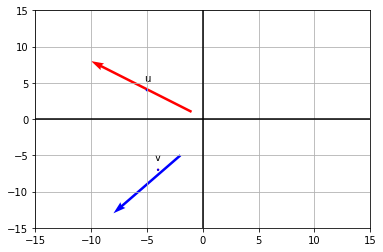

In [ ]:
u = [(-1,1), (-9, 7)]
v = [(-2,-5), (-6, -8)]
draw_vectors(u=u, v=v)

#### Magnitude & Direction
The magnitude of the vector $\vec{v} = \left(v_0, v_1, v_2, \dots, v_n\right)^T$, represented as $\|\vec{v}\|$ is the eucidian length of the vector.

For vectors, without an initial point, the zero vector is the default initial point. So for the vector $\vec{v}$, the magnitude is
$$\sqrt{(v_0 - 0)^2 + (v_1 - 0)^2 + (v_2 - 0) + \dots + (v_n - 0)^2}
= \sqrt{v_0^2 + v_1^2 + v_2 + \dots + v_n^2}
$$
For vectors, without an initial point $\vec{u} = \left(u_0, u_1, u_2, \dots, u_n\right)^T$, the magnitude is
$$\sqrt{(v_0 - u_0)^2 + (v_1 - u_0)^2 + (v_2 - u_0) + \dots + (v_n - u_0)^2}$$

The direction of the vector $\vec{v}$ w.r.t $\vec{u}$ is $\arccos\left(\frac{\vec{v} . \vec{u}}{\|\vec{u}\|\|\vec{v}\|}\right)$

**Note** *We will revisit it, when we would cover vector operations*

#### Equivalence
Vector has an associated scalar quanity called magnitude and a direction. Two vectors are considered to be equivalent, if both the magnitude and directions are same.

([(1, 1), (7, 7)], [(4, 3), (10, 9)])
[[ 4  3]
 [10  9]]


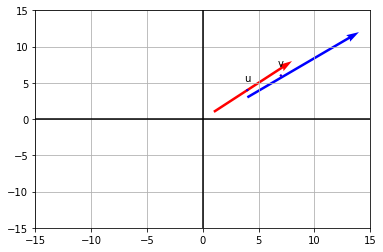

In [ ]:
u = [(1,1), (7, 7)]
v = [(4,3), (10, 9)]
draw_vectors(u=u, v=v)

**The following vectors are not equivalent as they differ by both direction and magnitude**

([(-1, 1), (-9, 7)], [(-2, -5), (-6, -8)])
[[2 5]
 [9 8]]


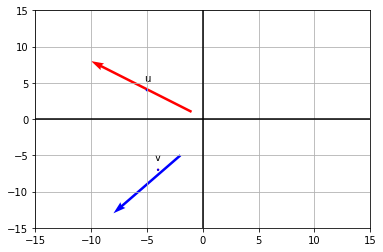

In [ ]:
u = [(-1,1), (-9, 7)]
v = [(-2,-5), (-6, -8)]
draw_vectors(u=u, v=v)

**The following vectors are not equivalent as though they have same magnitude, but the directions are different**

([(-1, 1), (-9, 7)], [(-1, -1), (-9, -7)])
[[1 1]
 [9 7]]


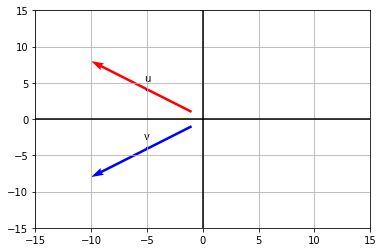

In [ ]:
u = [(-1,1), (-9, 7)]
v = [(-1,-1), (-9, -7)]
draw_vectors(u=u, v=v)

**The following vectors are not equivalent as though they have same direction, but the magnitudes are different**

([(-1, 1), (-4, 4)], [(2, 3), (-8, 9)])
[[2 3]
 [8 9]]


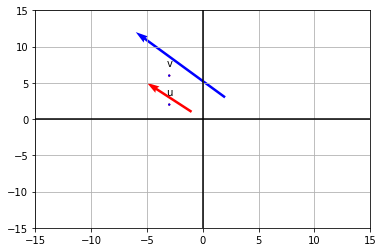

In [ ]:
u = [(-1,1), (-4, 4)]
v = [(2,3), (-8, 9)]
draw_vectors(u=u, v=v)


#### Matrices
Matrices are rectangular representation of numbers, expressions or symbols arranged in rows and columns. The matrix is a two dimensional entity with s hape $M \times N$, where M is the row count and N is the column count.
The following matrix is a $2 \times 3$ matrix as there are two rows and 3 columns.
$$
\left(\begin{array}{cc}
2 & 3 & 4\\
1 & 2 & 3
\end{array}\right)
$$
Each element of a matrix is denoted by $a_{ij}$, where `i` is the row number and `j` is the column number.
In Machine Learning, Matrix is used to represent collection of vectors. Most common representation is columna vector stacked sequentially in a row
$$
\left(\begin{array}{cc}
w_0^0 & w_0^1 & w_0^2 \dots & w_0^m\\
w_1^0 & w_1^1 & w_1^1 \dots & w_1^m\\
\vdots & \vdots & \vdots \ddots & \vdots\\
w_n^0 & w_n^1 & w_n^1 \dots & w_1^m\\
\end{array}\right)
$$

For an element of this matrix $w_i^j$$, the superscript `j` denote the $j^{th}$ vector and the subscript `i` denote the $i^{ith}$ component of the vector `i`. So the above can be equivalently conceived as
$$\left(\begin{array}{cc}\vec{v^0} & \vec{v^1} & \vec{v^2} \dots \vec{v^n}
\end{array}\right) $$
$$
\left(\begin{array}{cc}
\left(\begin{array}{cc}w_0^0 \\
w_1^0 \\
\vdots \\
w_1^0
\end{array}\right) & \left(\begin{array}{cc}w_0^1 \\
w_1^1 \\
\vdots \\
w_1^1
\end{array}\right) & \left(\begin{array}{cc}w_0^2 \\
w_1^2 \\
\vdots \\
w_1^2
\end{array}\right) & \dots & \left(\begin{array}{cc}w_0^n \\
w_1^n \\
\vdots \\
w_1^n
\end{array}\right)
\end{array}\right)
$$


# MATH
## Lecture 1: Vectors and Matrices

### Vector Operations

#### Addition and Subtracttion & the zero vector

Addition and Subtraction of two same dimension vectors are the component/element wise addition/subtraction of the vectors.

Consider two vectors

$$\vec U = \left(\begin{array}{cc}
u_0\\
u_1\\
u_2\\
\vdots\\
u_n
\end{array}\right),
\vec V = \left(\begin{array}{cc}
v_0\\
v_1\\
v_2\\
\vdots\\
v_n
\end{array}\right)
$$
Then
$$
\Rightarrow \vec U + \vec V = \left(\begin{array}{cc}
u_0 + v_0\\
u_1 + v_0\\
u_2 + v_0\\
\vdots\\
u_n + v_n
\end{array}\right)
$$
$$
\Rightarrow \vec U - \vec V = \left(\begin{array}{cc}
u_0 - v_0\\
u_1 - v_0\\
u_2 - v_0\\
\vdots\\
u_n - v_n
\end{array}\right)$$

(array([3, 3]), array([-4,  9]), array([-1, 12]))
(array([[0., 0.],
       [3., 3.]]), array([[ 0.,  0.],
       [-1., 12.]]), array([[ 3,  3],
       [-4,  9]]))
[[ 3.  3.]
 [ 4. 12.]]


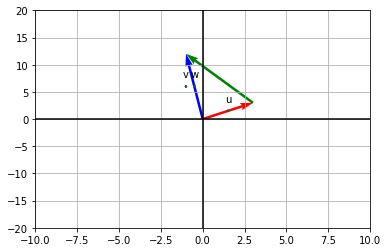

In [ ]:
u = np.asarray((3, 3))
v = -np.asarray((4,- 9))
w = u + v
print(u, v, w)
u, v = add_displacement(u, v)
w = np.array([u[0], w])
draw_vectors(u=u, v=v,w=w)

#### Scalar multiplication
To recollect, scalar is a quantity which has magnitude but no direction. Multiplying a scalar quantity with a vector, involves multiplying each of the component of the vector. Notably,
if $\vec V = \left(v_0, v_1, v_2, \dots, v_n\right)^T$ and `p` is a scalar quantity, then

$p \cdot \vec v = \left(p \cdot v_0, p \cdot v_1, p \cdot v_2, \dots, p \cdot v_n\right)^T$
As a scalar quantity has no direction, so multiplying a vector by a scalar quantity only changes the magnitude, leaving the direction intact.

**Example**

$\vec V = \left(3, 1, 4\right)$ and $p = 2$ then $p \cdot \vec V = \left(6, 2, 8\right)$

**Question**
Vector $\vec v = \left(x, y\right)$ and $\|\vec v\|=10$

**Find the value of**

Vector $\vec w = \left(\frac{3}{4}x,\frac{3}{4}y\right)$, so $\|\vec w\|= ?$

Vector $\vec z = \left(-\frac{2}{5}x,-\frac{2}{5}y\right)$, so $\|\vec z\|= ?$

**Match each vector defined above to a vector that could be its equivalent.**

$$
\begin{array}{|c|c|c|c|}
\hline
1& \vec v & \LARGE \leftarrow \\ \hline
2& \vec w & \Huge \leftarrow \\ \hline
3& \vec z & \rightarrow \\ \hline
\end{array}
$$

#### Transpose
Transpose of a matrix, flips the matrix over its diagonal $\because$, if $a_{ij}$ is an element of a matrix `P` with dimension $M \times N$ then, transposing `P` would yield a new Matrix $P^T$ of dimension $N \times M$ where $a_{ij} = a_{ji}$
Since, a vector is a 2-dimensional matrix where one of the dimension is one, transposing a vector, simply flips it such that, a row vector changes to a column vector or vice versa.
It can easily be observed that the transpose operation is an involution (self inverse) $\because \left(A^T\right)^T = A$

**Example**
$$
P = \left(\begin{array}{cc}
1 & 3 & 5\\
2 & 4 & 6
\end{array}\right)
\text{ then }, P^T =
\left(\begin{array}{cc}
1 & 2\\
3 & 4\\
5 & 6
\end{array}\right)
$$
$$
\vec v = \left(\begin{array}{cc}
1 & 3 & 5
\end{array}\right)
\text{ then }, \vec{v}^T =
\left(\begin{array}{cc}
1 \\
3 \\
5
\end{array}\right)
$$

### Vector Dot Product
Vector Dot Product also known as Scalar Product of two vectors is an algebraic operation, that takes two same-dimension vectors and adds the element-wise inner products.
If $\vec u = (u_0, u_1, u_2, \dots, u_n)$ and $\vec v = (v_0, v_1, v_2, \dots, v_n)$ then
$\vec u \cdot \vec v  = \sum_{i=0}^{n}(u_i \cdot v_i)$

**Example**
$\vec u = (1, 2, 3)$ and $\vec v = (3, 2, 1)$ then

$\vec u \cdot \vec v = (1 \cdot 3 + 2 \cdot 2 + 3 \cdot 1) = 10$

Alternatively, the scalar product is the product of the magnitudes of the vectors and the cosine of the smallest angle between them. So,

$\vec u \cdot \vec v = \|\vec u\|\cdot\|\vec v\|\cdot \cos(\theta) \tag{1}$

# MATH
## Lecture 1: Geometry of Column Vectors

#### Vectors as directions

From the above formulation, we can rewrite (1) as

$$\vec u \cdot \vec v = \|\vec u\|\cdot\|\vec v\|\cdot \cos(\theta) \tag{1}$$
$$\Rightarrow \cos(\theta) = \frac{\vec u \cdot \vec v}{\|\vec u\|\cdot\|\vec v\|}\tag{2}$$

We can verify (2) trivially for a two-dimensional vectors. Let $\vec u = (2, 4)$ and $\vec v = (4, 2)$ then from (2)
$$\Rightarrow \cos(\theta) = \frac{\vec u \cdot \vec v}{\|\vec u\|\cdot\|\vec v\|}$$
$$\Rightarrow \cos(\theta) = \frac{(2 \cdot 4 + 4 \cdot 2)}{\sqrt{2^2 + 4^2} \cdot \sqrt{2^2 + 4^2}}\tag{2}$$
$$\Rightarrow \cos(\theta) = \frac{(2 \cdot 4 + 4 \cdot 2)}{\sqrt{(2^2 + 4^2)} \cdot \sqrt{2^2 + 4^2}}\tag{2}$$
$$\Rightarrow \cos(\theta) = \frac{16}{\sqrt{20} \cdot \sqrt{20}} = \frac{16}{\sqrt{20^2}} = \frac{16}{20} = \frac{4}{5}$$
$$\theta = \cos^{-1}{\frac{4}{5}}$$

**Proof for a two dimensional vector space**

Let $\vec a = \|a\|\angle r$ where $\|a\|$ is the magnitude and theta is the direction
Similarly $\vec b = \|b\|\angle$s

In cartesian coordinates $\vec a = (\|a\|\cos r, \|a\|\sin r)$ and $\vec b = (\|b\|\cos s, \|b\|\sin s)$
$$\Rightarrow \vec a \cdot \vec b = \|a\|\cos r \cdot \|b\|\cos s + \|a\|\sin r \cdot \|b\|\sin s$$
$$\Rightarrow \vec a \cdot \vec b = \|a\|\|b\|(\cos r\cos s + \sin r\sin s)$$
$$\Rightarrow \vec a \cdot \vec b = \|a\|\|b\|(\cos r\cos s + \sin r\sin s)$$
$$\Rightarrow \vec a \cdot \vec b = \|a\|\|b\|\cos (r - s)$$
$$\Rightarrow \vec a \cdot \vec b = \|a\|\|b\|\cos \theta$$

#### Scalar multiplication

(array([20, 40]), array([40, 80]))
(array([20, 40]), array([40, 80]))
[40 80]


/usr/local/lib/python2.7/dist-packages/matplotlib/quiver.py:624: RuntimeWarning: invalid value encountered in true_divide
  lengths = np.hypot(*dxy.T) / eps


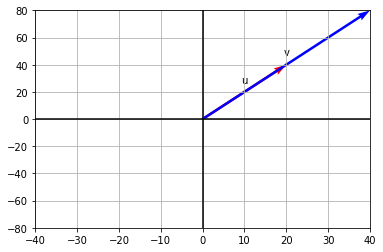

In [ ]:
u = np.asarray((20, 40))
q = 2
v = 2 * u
print(u, v)
draw_vectors(u=u, v=v)

#### Addition as displacement
Geometrically, vectors are considered as displacement. For two dimensional vectors, $\vec U = \left(1, 3\right)$ and $\vec V = \left(8, 7\right)$ then

$\vec U + \vec V =$

(array([[0., 0.],
       [3., 3.]]), array([[ 0.,  0.],
       [ 7., -6.]]), array([[ 3,  3],
       [ 4, -9]]))
[[3. 3.]
 [7. 9.]]


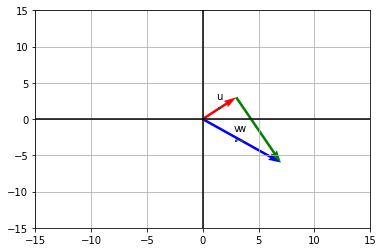

In [ ]:
u = np.asarray((3, 3))
v = np.asarray((4,- 9))
w = u + v
u, v = add_displacement(u, v)
w = np.array([u[0], w])
draw_vectors(u=u, v=v, w=w)

#### Subtraction as mapping
$(\vec U -\vec V) + \vec V = \vec U$

(array([[0., 0.],
       [3., 3.]]), array([[ 0.,  0.],
       [-1., 12.]]), array([[ 3,  3],
       [-4,  9]]))
[[ 3.  3.]
 [ 4. 12.]]


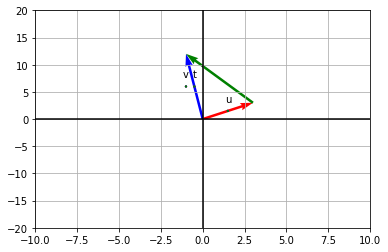

(array([[0., 0.],
       [3., 3.]]), array([[ 0.,  0.],
       [-1., 12.]]), array([[ 3,  3],
       [-4,  9]]))
[[ 3.  3.]
 [ 4. 12.]]


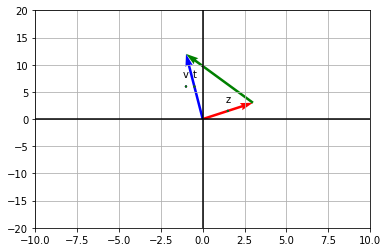

In [ ]:
u = np.asarray((3, 3))
v = -np.asarray((4,- 9))
t = u + v
z = t - v
u, v = add_displacement(u, v)
t = np.array([u[0], t])
z = np.array([u[0], z])
draw_vectors(u=u, v=v, t=t)
draw_vectors(z=z, v=v, t=t)

# MATH
## Lecture 1: Measures of Magnitude

### Definition of Norms
A norm is a measure of “distance”. These are the three properties they need to have. General notation is a single bar or a double bar surrouding the vector $\|V\|$

### Properties of Norm
A $\bar V$ is a nonnegative-valued scalar function $\rho V \rightarrow [0,+\infty)$ with the following properties
* Norms are positive - As norm is a measurement of distance, and distances cannot be negative, so norms are always positive
* Satisfies Triangle inequality - $\rho(\vec u + \vec v) \le \rho(\vec u) + \rho(\vec v)$
* Is absolutely homogenous/scalable: $\rho(a\vec v) = |a|\rho(\vec v)$
* $\rho(\vec v) = 0 \iff \vec v  = 0$

### Mathematical Definition

The vector Norm $\|V\|$ for $p \in \mathbb{N}$ is defined as $\|V\|_p = \left(\sum_i^n{|x_i|^p}\right)^{\frac{1}{p}}$

**L1-Norm or Manhattan Norm**

If p = 1, we get $\|V\|_1 = \left(\sum_i^n{|x_i|^1}\right)^{\frac{1}{1}} = \left(\sum_i^n{|x_i|}\right)$. This is the manhattan distance, the distance between two points in a grid strinctly travering either horizontally or vertically. The name is based on the gridlike street geography of the New York borough of Manhattan.

**L2-Norm or Euclidian Norm**

If p = 2, we get $\|V\|_2 = \left(\sum_i^n{|x_i|^2}\right)^{\frac{1}{2}} = \sqrt{\sum_i^n{|x_i|^2}}$. This is the euclidian distance, the shortest distance between two points in a grid. Also called euclidian norm, this can also be epressed as the root of the dot product i.e. $\sqrt{\vec v \cdot \vec v}$

**L$\infty$-Norm or Maximum norm**

If p = $\infty$, we get $\|V\|_\infty = \left(\sum_i^n{|x_i|^\infty}\right)^{\frac{1}{\infty}} = \left(\sum_i^n{|x_i|^\infty}\right)^{\frac{1}{\infty}}$. Let $x_k$ be component with the maximum value. We can then express the expression as
$$\Rightarrow \|V\|_\infty = \left(\sum_i^n{|x_i|^\infty}\right)^{\frac{1}{\infty}}$$
$$\Rightarrow \|V\|_\infty = \left(\sum_i^{k-1}{|x_i|^\infty + x_k^\infty + \sum_{k+1}^n{|x_i|^\infty}}\right)^{\frac{1}{\infty}}$$
$$\Rightarrow \|V\|_\infty = x_k\left(\sum_i^{k-1}{\left(\frac{|x_i|}{x_k}\right)^\infty + \left(\frac{x_k}{x_k}\right)^\infty + \sum_{k+1}^n{\left(\frac{|x_i|}{x_k}\right)^\infty}}\right)^{\frac{1}{\infty}}$$
$$\Rightarrow \|V\|_\infty = x_k\left(\sum_i^{k-1}{\left(0\right)^\infty + \left(1\right)^\infty + \sum_{k+1}^n{\left(0\right)^\infty}}\right)^{\frac{1}{\infty}}$$
$$\Rightarrow \|V\|_\infty = x_k$$

So, if $\vec V = (V_0, V_1, V_2, \dots, V_n)$ then $\|V\|_\infty = \max(|V_0|, |V_1|, |V_2|, \dots, |V_n|)$

**L0-Norm or Zero norm**

If p = 0, we get $\|V\|_0 = \left(\sum_i^n{|x_i|^0}\right)^{\frac{1}{0}}$ does not exist. Unfortunately, it is difficult to work with an expression with zero-th root. So, we drop the pth root from the expression and re-write it in the limitting form $\lim_{p \to 0}{\sum\limits_{k=1}^{n}{|x_k|^p}}$. An alternate way express it is $\|x\|_0 = \#(i|x_i = 0)$ which is total number of non-zero elements in a vector.

So, its a measurement of number of non-zero components of the vector.

## Intuition to Regularization

Let's revisit the problem of predicting the price from the apartment size. Instead of fitting a line, let's try to fit a polynomial to follow the relationship accurately

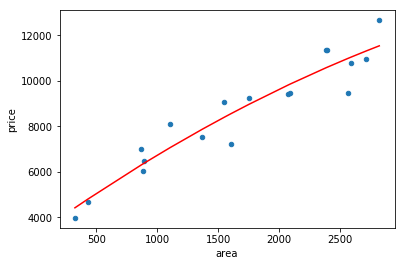

In [ ]:

df.plot.scatter(x='area', y='price')
param_2 = np.polyfit(df.area, df.price, 2)
poly_2 = np.poly1d(param_2)
plt.plot(df.area,poly_2(df.area),"r")

The above is fitted with a quadration function $f = \theta_0+ \theta_1x + \theta_2x^2$

Noting that the function might have missed few points, we can try to fit a higher polynomial sp-line $f = \theta_0+ \theta_1x + \theta_2x^2 + \theta_2x^3 + \theta_2x^4$ to capture the relationship accurately.

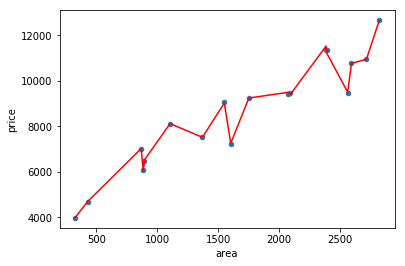

In [ ]:

df.plot.scatter(x='area', y='price')
param_15 = np.polyfit(df.area, df.price, 15)
poly_15 = np.poly1d(param_15)
plt.plot(df.area,poly_15(df.area),"r")

and end up overfitting it. To reduce the variance (onother technical term for overfitting) is to reduce the influence the impact of higher order terms. To penalize the higher order term, we can add the higher order term to the loss function and try to minimize it.

$$\underset{\theta}{\min} \frac{1}{2m}\sum_1^m{h_{\theta}\left(x^{(i)} - y^{(i)}\right)^2} + \lambda\theta_3^2 + \lambda\theta_4^2$$


The price of an apartments depends on multiple features $x_0, x_1, x_2, \dots x_n$ corresponding to size, location, builder et. al. In absence of appropiate frature engineering, it is difficult to predict which of there features have a higher contributing factor. So alternatively, given the feature set  ${x_0, x_1, x_2, \dots x_n}$ and the corresponding parameters ${\theta_0, \theta_1, \theta_2, \dots, \theta_n }$, it is difficult to predict, which of the parameters should be penalized. So, instead of being choosy, we can try to shrink all the parameters
$$J(\theta) = \underset{\theta}{\min} \frac{1}{2m}\sum_1^m{h_{\theta}\left(x^{(i)} - y^{(i)}\right)^2} + \lambda\sum_{i=1}^n{\theta_j^2}$$
and then validate what is the right set of parameters that minimizes the cost

## L1 vs L2
In the above expression, for both the error as well as normalization, we have used $L_2$ norm. Intuitively, we can also use an $L_1$ norm

For an overfitted model, to reduce the influence of the training data, we apply an $L_1$norm to the solution vector, and try to make it as small as possible. So instead of finding the best vector $X$ to minimize a loss function $f(X)$, we will try to minimize $\left(f(x) + L_1(x)\right)$. An $X$ with small $L_1$ norm tends to have a sparse solution. Being sparse means that the majority of $X$’s components (weights) are zeros and a sparse solution could avoid over-fitting.

We can pictorially define the norms as
![regularization 1](https://6ulhxg.dm.files.1drv.com/y4mYn1aSue-xMZIn0OKNQOz43_VMGlYSAy-OYddcEPbYi4TEOa_k0YcHETaI-2NXxpuvntAjhfzwr4v-Y8nnQ5lnNxoqrjP32ariyF4Uu80mgmf0kkzOXC5-l_nv3HQLs7kXWVMtON4rwzt1n7LS0gW7GB2ZZ_sbdG__8WctmZ8a5GTERYT05cYoSJRp6uLDk2wUj6sxmgXYWN9dijcyU0qmQ?width=492&height=199&cropmode=none)

Appreciate the fact that, minimum is achived only at the corners. For an n-dimensional hyper space, a corner is defined as one or more componets to be zero, which inherently achives spare solution.

The advantage of $L_1$ over $L_2$ can now be explained through the idea of fitting a line over a set of points.
![regularization 1](https://7olhxg.dm.files.1drv.com/y4mkv1b1nayg0BIl78CBsPJlkCmLMrwVrTE0PrR9OCWT1wxrtjTBK_0W74XN8IUlFLTSK48gi7efIUf8hneCADu_Sph2PzEroxLojrW5dCq7uA6dNMzerBPvYPbo8lQfeIKHdOB0VI6iF2eshI11j1VhyY8HddQdw5anw6kFDYmt3Xy0bmD6lSum8xv-9RTurzrDwFaZnbG2u9iTo5-ZJxHNw?width=679&height=572&cropmode=none)

The $L_2$ norm is a square expression $\sqrt{(y_1 - \omega_1^TX_1)^2 + (y_2 - \omega_2^TX_2)^2 + \dots + (y_n - \omega_n^TX_n)^2}$ and the square terms blows up the error difference of the outliers. The minimization algorithm rushes in to fix the situation and inadvertently focuses majorly on the outliers and less so on the actual data. Thus we end up on the blue line.

An $L_1$ norm is much more imune to outlinersas its defined as |(y1−ωT1x1)|+|(y2−ωT2x2)|+…+|(yn−ωTnxn)|. There is no square term to blow up the error difference of the outliers and the minimization algorithm keeps its focus on the data instead of the outliers. This achieves the red line.

Unfortunately $L_1$ norm is not differentiable (the derivative at x = 0 is not continious) and is not attractive to use in an optimization setting whereas $L_2$ has a closed form solution and is attractive.

Finally for your visual treat, here are the visual representation of various norms from p = 0 through p = $\infty$
![regularization 1](https://6plhxg.dm.files.1drv.com/y4mQojZu1HGehKqGF1zJ_fBRXr0ZHsRpzRvDgdaUpyOb4OLYDS7iYVDt81ocQqWv8gDfbY6O7-W9-5T1wV2ZJCY2ralc0GfwdvHmtZUTJnNYtjFuDbOWgVAOr71yb8SRTsFDHl2EwhCK8Z-zYRGTPxNKSy_UAisCe8dBVuKL8gcLT3OMrNhGUuZaRGnhHL2a0m2mHk4hnyGQwyE_b3nrOcoeg?width=1204&height=300&cropmode=none)

![LASSO_RIDGE](https://drive.corp.amazon.com/view/abhijbha@/HostedImages/MLU/MATH/ridge_lasso.png?download=true)


# MATH
## Lecture 1: k-Nearest Neighbors

We now have the tools to define what is perhaps the simples machine learning algorithm of all. Suppose  we  have  a  collection  of  input  vector $\{\vec{x}_i\}^N_{i=1}$ and  target values $\{\vec{y}_i\}^N_{i=1}$.  Think of this where the $x_i$ are the pixel brightnesses of images of handwritten digits written out, and the $y_i$ are 0 if the image shows a zero, and 1 if the image is a 1.If we are given a new image $\vec{x}$ and we want to tell if it is a zero or a one, we can implement the following algorithm: If you want to
* **input**  : $\{\vec{x}_i\}^N_{i=1},\{\vec{y}_i\}^N_{i=1}, \vec{x}$, and $k$
* **output**: A prediction for the correct $y$ value to pair with $\vec{x}$ given the dataset made by having the $k$ nearest points vote (best if $k$ is odd).
* $S \leftarrow [(\|\vec{x}−\vec{x_i}\|, y_i)\text{ }\forall i \in {1,2, . . . , N}];$
* $S \leftarrow$ sort(S by first component);
* **return** MostCommon(second component of S[0 :k]) predict a number instead of a binary label, you can take the average value instead.